In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import collections

In [2]:
G = nx.watts_strogatz_graph(100, 5, p = 0.4)

In [6]:
degree_sequence=sorted([d for n,d in G.degree()], reverse=True) # degree sequence
#print "Degree sequence", degree_sequence
degreeCount=collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

# Single figure

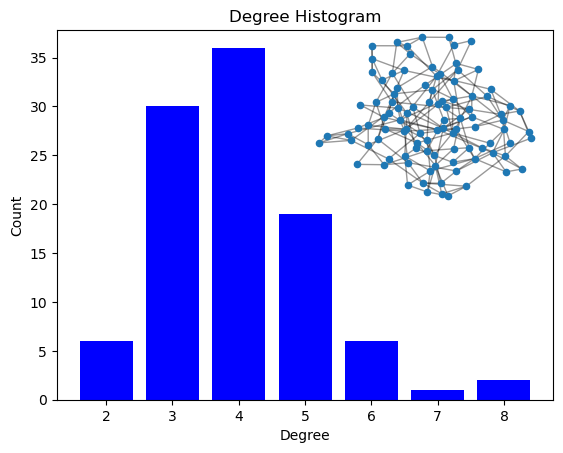

In [14]:
fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.5, 0.5, 0.4, 0.4])
pos=nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

# Multiple figures

In [24]:
def plot_one_fig(ax, G):
    ax.bar(deg, cnt, width=0.80, color='b')

    ax.set_title("Degree Histogram")
    ax.set_ylabel("Count")
    ax.set_xlabel("Degree")
    ax.set_xticks([d for d in deg])
    ax.set_xticklabels(deg)

    # draw graph in inset
    ax_in = ax.inset_axes([0.5, 0.5, 0.4, 0.4])
    pos=nx.spring_layout(G)
    ax_in.axis('off')
    nx.draw_networkx_nodes(G, pos, node_size=20, ax = ax_in)
    nx.draw_networkx_edges(G, pos, alpha=0.4, ax = ax_in)

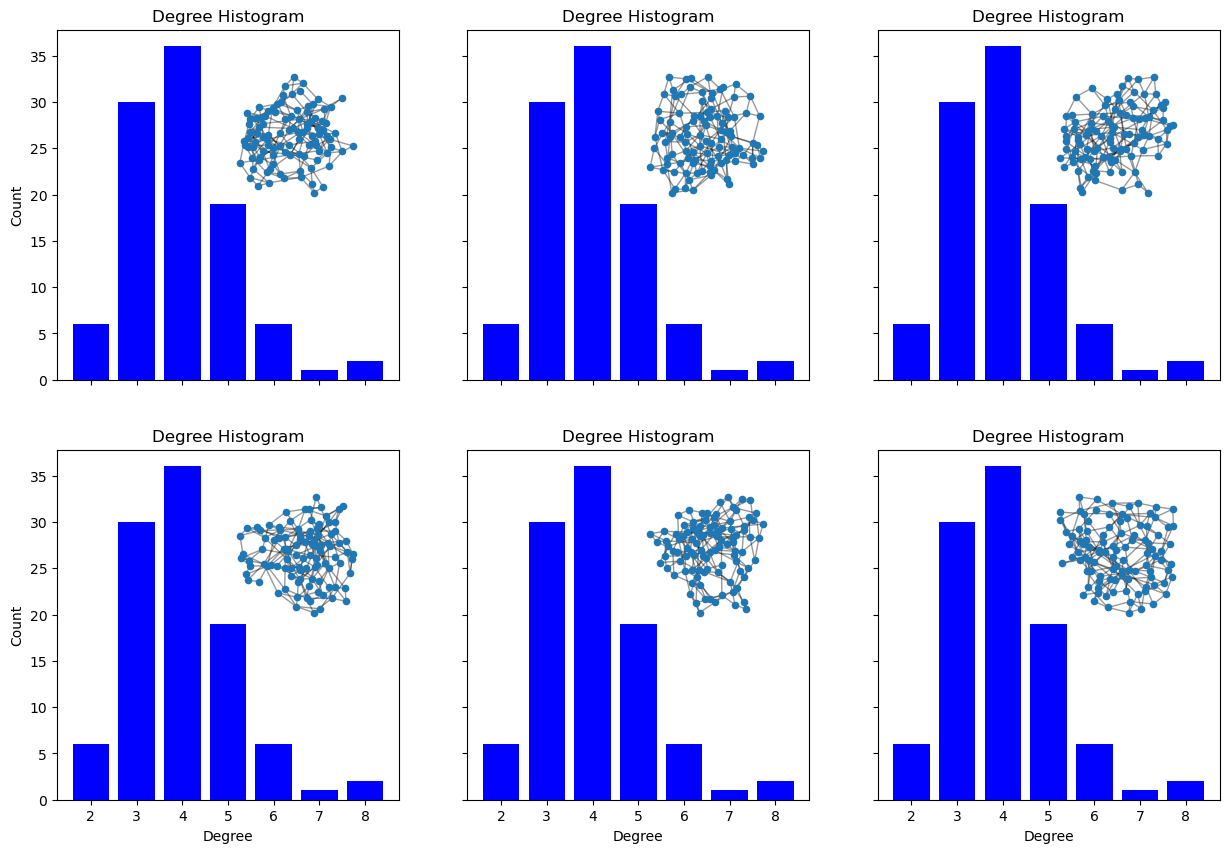

In [26]:
rows = 2
cols = 3

fig, axes = plt.subplots(rows, cols, figsize = (15,10))

for i in range(rows):
    for j in range(cols):
        plot_one_fig(axes[i][j], G)
        
for ax in axes.flat:
    ax.set(xlabel='Degree', ylabel='Count')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axes.flat:
    ax.label_outer()